**Projeto da disciplina de Data Mining**

**PESC - Programa de Engenharia de Sistemas e Computação**

**COPPE / UFRJ**

Autor: Rafael Lopes Conde dos Reis

E-mail: condereis@cos.ufrj.br  

# Resumo

O trabalho consiste em analisar a aplicação da técnica K-means para clusterizar os filmes da base do MovieLens. Deve-se observar os clusters gerados para diferentes valores de k (15-30), assim como antes e depois de executar redução de dimensionalidade, com PCA (10-15 dimensões).

# Pacotes Utilizados

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

%matplotlib inline

# Pré-processamento

A base fornecida pelo MovieLens contém 4 colunas (userId, movieId, rating e timestamp), como pode ser visto abaixo. O pré-processamento irá gerar uma matriz *usuários x filmes* tendo todas as avaliações faltantes substituidas pela média da avaliação do filme.

In [3]:
raw_data = pd.read_csv('../data/movielens/ratings.csv')
movie_labels = pd.read_csv('../data/movielens/ratings.csv')
raw_data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
# Dataframe com colunas identificadas pelos ids dos filmes
ratings_df = pd.DataFrame(
    columns=raw_data.movieId.sort_values().unique())

for index, row in raw_data.iterrows():
    ratings_df.set_value(row.userId, row.movieId, row.rating)

In [25]:
ratings_df = ratings_df.T
print ratings_df.shape
i=0
for index, row in ratings_df.iterrows():
    row_null = True
    for obj in row:
        if obj:
            row_null = False
    if row_null:
        i+=1
            
    
i

(671, 9066)


0

O resultado é uma matriz repleta de NaNs. Esses valores serão substituidos pela nota média do filme.

In [9]:
# Substitui NaNs pela média das notas do filme
# ratings_df.mean(axis=1).shape
fill_by_columns = ratings_df.fillna(ratings_df.mean(axis=0),axis=0)
fill_by_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
1.0,3.87247,3.401869,3.161017,2.384615,3.267857,3.884615,3.283019,3.8,3.15,3.45082,...,2.5,0.5,3.0,1.0,1.5,5.0,4.5,5.0,3.0,5.0
2.0,3.87247,3.401869,3.161017,2.384615,3.267857,3.884615,3.283019,3.8,3.15,4.00000,...,2.5,0.5,3.0,1.0,1.5,5.0,4.5,5.0,3.0,5.0
3.0,3.87247,3.401869,3.161017,2.384615,3.267857,3.884615,3.283019,3.8,3.15,3.45082,...,2.5,0.5,3.0,1.0,1.5,5.0,4.5,5.0,3.0,5.0
4.0,3.87247,3.401869,3.161017,2.384615,3.267857,3.884615,3.283019,3.8,3.15,4.00000,...,2.5,0.5,3.0,1.0,1.5,5.0,4.5,5.0,3.0,5.0
5.0,3.87247,3.401869,4.000000,2.384615,3.267857,3.884615,3.283019,3.8,3.15,3.45082,...,2.5,0.5,3.0,1.0,1.5,5.0,4.5,5.0,3.0,5.0


In [11]:
# Substitui NaNs pela média das notas do user
fill_by_rows = ratings_df.T.fillna(ratings_df.mean()).T
fill_by_rows.head()

,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
1.0,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,...,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247,3.87247
2.0,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187,4,...,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187,3.40187
3.0,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,...,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102,3.16102
4.0,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462,4,...,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462,2.38462
5.0,3.26786,3.26786,4,3.26786,3.26786,3.26786,3.26786,3.26786,3.26786,3.26786,...,3.26786,3.26786,3.26786,3.26786,3.26786,3.26786,3.26786,3.26786,3.26786,3.26786


In [14]:
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10, n_jobs=-1).fit(fill_by_columns.transpose())
print kmeans.score(fill_by_columns.transpose())
kmeans = KMeans(n_clusters=15, init='k-means++', n_init=10, n_jobs=-1).fit(fill_by_rows.transpose()))
print kmeans.score(fill_by_rows.transpose())

-100179.088547
-112244.202116


In [13]:
# Salva o dataframe em arquivo para facilitar o acesso
ratings_df.to_csv('../data/movielens/input_matrix.csv',
                  index=False)

# Clusterização sem Redução de Dimensionalidade
O primeiro passo é aplicas k-means a matriz de dados completa, sem nenhuma forma de redução de dimensionalidade.

In [14]:
ratings_df = pd.read_csv('../data/movielens/input_matrix.csv')

Serão treinados 15 modelos diferentes, variando o número de clusters entre 15 e 30. Para cada modelo foram feitas 10 inicializações (n_init=10) e escolhida a melhor, para tentar encontrar um modelo mais próximo do mínimo global, uma vez que k-means apenas garante convergência para um mínimo local. A inicialização usada foi a k-means++, que inicia os centroides afastados uns dos outros, o que tende a garantir melhores resultados que uma inicialização aleatória [1].

In [24]:
score_list = []
for k in range(15,31):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10,
                    n_jobs=-1).fit(ratings_df.transpose())
    score_list.append(kmeans.score(ratings_df.transpose()))

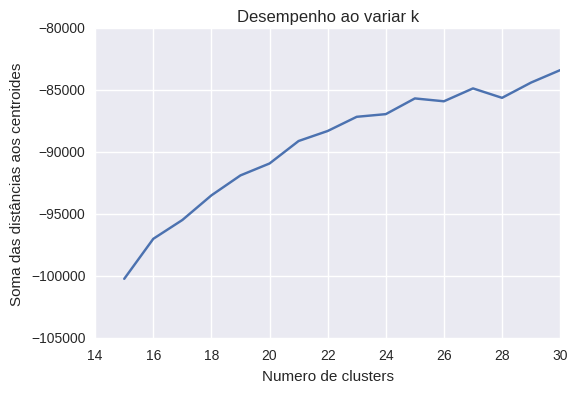

In [31]:
plt.plot(range(15,31), score_list)
plt.title('Desempenho ao variar k')
plt.xlabel('Numero de clusters')
plt.ylabel(u'Soma das distâncias aos centroides')

# Aplicando PCA aos Dados

In [44]:
score_list = []
for n_comp in range(1,16):
    pca = PCA(n_components=n_comp, svd_solver='arpack')
    matrix_reduc = pca.fit_transform(ratings_df.transpose())
    kmeans = KMeans(n_clusters=30, init='k-means++', n_init=10,
                    n_jobs=-1).fit(matrix_reduc)
    score_list.append(kmeans.score(matrix_reduc))

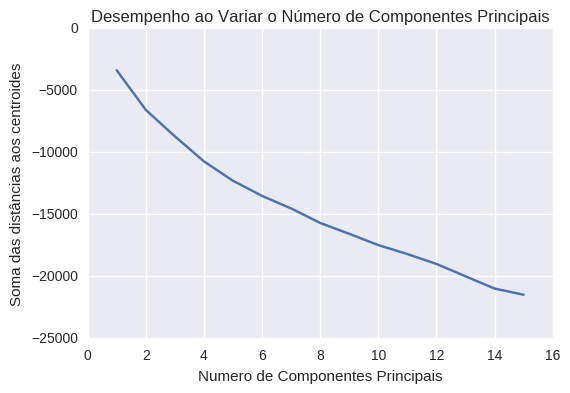

In [45]:
plt.plot(range(1,16), score_list)
plt.title(u'Desempenho ao Variar o Número de Componentes Principais')
plt.xlabel(u'Numero de Componentes Principais')
plt.ylabel(u'Soma das distâncias aos centroides')

(9066, 2)


([], <a list of 0 Text yticklabel objects>)

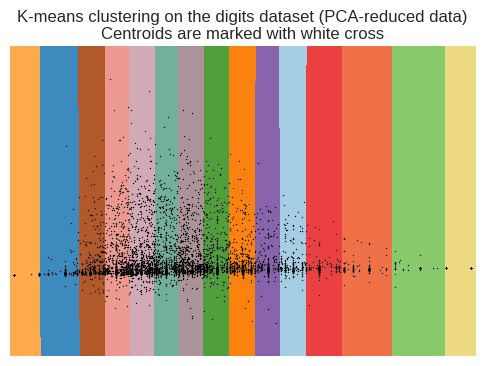

In [83]:
reduced_data = PCA(n_components=2).fit_transform(ratings_df.transpose())
kmeans = KMeans(init='k-means++', n_clusters=15, n_init=10)
kmeans.fit(reduced_data)
print reduced_data.shape
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [90]:
out = pd.Series(kmeans.predict(reduced_data), index=ratings_df.transpose().index)

# # ratings_df.transpose().loc['163949']
print out.loc['2628'],out.loc['5378'],out.loc['33493'],out.loc['61160'],out.loc['122886'],out.loc['260']

12 4 10 9 2 14


# Clusterização com Redução de Dimensionalidade

In [38]:
score_list = []
for k in range(15,31):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10,
                    n_jobs=-1).fit(matrix_reduc)
    score_list.append(kmeans.score(matrix_reduc))

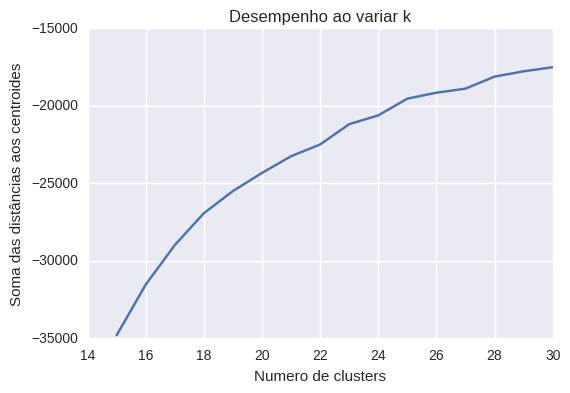

In [39]:
plt.plot(range(15,31), score_list)
plt.title('Desempenho ao variar k')
plt.xlabel('Numero de clusters')
plt.ylabel(u'Soma das distâncias aos centroides')

# Referências
[1] - [“k-means++: The advantages of careful seeding”](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf) Arthur, David, and Sergei Vassilvitskii, Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, Society for Industrial and Applied Mathematics (2007)